- Spatial operations use pixels in a neighbothood to determine the present pixel value. Applications include filtering and sharping. 
- Linear Filtering
  - Filtering Noise
  - Gausian Blur
  - Image sharpening
- Edges
- Median
- Threshold


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image1,image2,title1='original',title2='New Image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.show()
#Spatial operations use the nanoring pixels to determine the present pixel value.


### Linear Filtering
- Filtering involves enhancing an image,for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factores that cause noise may lead to blurry images,we can apply filters to sharpening these images,
- Convolution is a standard way filter an image the filter is called the kernel and different kernels perform diffrent tasks.

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


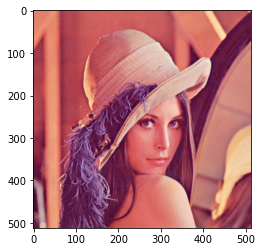

In [3]:
# Loads the image from the specified file
image = cv2.imread("lenna.png")
print(image)
# Converts the order of the color from BGR (Blue Green Red) to RGB (Red Green Blue) then renders the image from the array of data
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


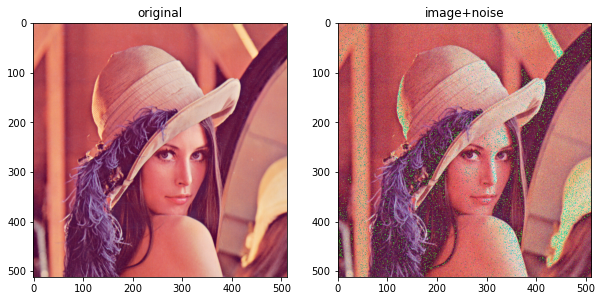

In [4]:
rows,cols,_=image.shape
noise=np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image=image+noise
plot_image(image,noisy_image,'original','image+noise')

-When adding noise to an image sometimes the value might be greater than 255, in this case, 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 we get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.

### Filtering Noise
- smoothing filters average out the pixels within a neighborhood,they are sometimes called low pass filters. For mean filtering, the kernel simply averages out the kernels in a neighborhood.

In [5]:
#create a kernel which is a 6 by 6 array where each value is 1/36
kernel=np.ones((6,6))/36

- The function filter2D performs 2D convolution between the image src and the kernel on each color channel independetly.
- the parameter "ddepth" has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [6]:
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)

- We can plot the image before and after the filtering; we see the noise is reduced, but the image is blurry.

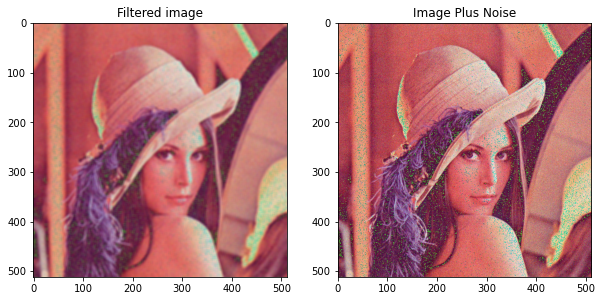

In [7]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title1="Filtered image",title2="Image Plus Noise")

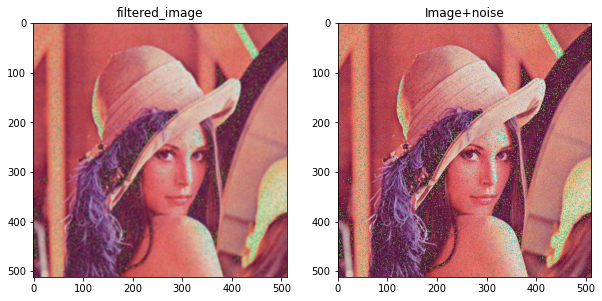

In [8]:
#A smaller kenel keeps the image sharp,but filters less noise, here we try a 4*4 kernel.
kernel=np.ones((4,4))/16
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
plot_image(image_filtered,noisy_image,title1='filtered_image',title2='Image+noise')

### Gaussian Blur
- The function GaussianBlur convolves the source image with the specified Gausian kernel. It filters noise but does a better job of preserving the edges.

- parameter
  - src :- input image; the image can have any number of channels,which are processed independently.
  - ksize- Gausian kernel size
  - sigmaX- gaussian kernel standard deviation in x direction.
  - sigmaY- Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX.

#### What is kernel
- kernel also known as a filter or a mask, refers to a small matrix of numbers used for various operations such as convolution,filtering,and transformation of images. The kernel determines how the neighboring pixels of an imageg are combined or modified to produce the desired effect.

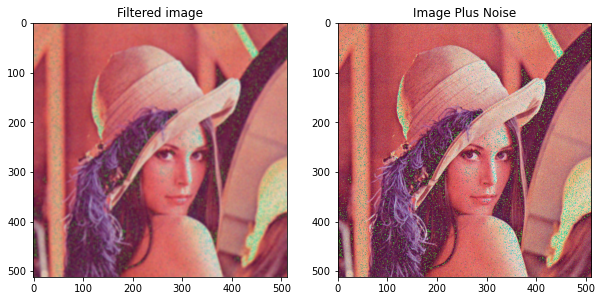

In [10]:
image_filtered=cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered , noisy_image,title1="Filtered image",title2="Image Plus Noise")

-  sigma behaves like the size of the mean filter, a larger value of sigma will make the image blurry, but you are still constrained by the size of the fileter

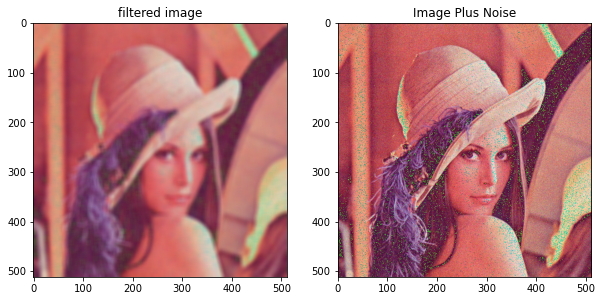

In [22]:
# Filters the images using GaussianBlur on the image with noise using a 11 by 11 kernel 
image_filtered = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title1="filtered image",title2="Image Plus Noise")

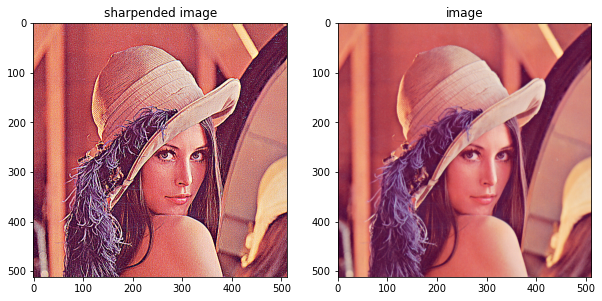

In [24]:
#common Kernel for image sharpening
kernel=np.array([[-1,-1,-1],
                 [-1, 9,-1],
                 [-1,-1,-1]])
#Applys the sharpening filter using kernel on the original image without noise
sharpened=cv2.filter2D(image,-1,kernel)

#plots the sharpended image and the original image without noise
plot_image(sharpened,image,'sharpended image','image')

## Edges
- Edges are where pixel intensities change. The Gradient of a function outputs the rate of change, we can approximate the gradient of a grayscale image with convolution
- let's use the sobel edge detector. This combines convolutions and finding the magnitude of the result.

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


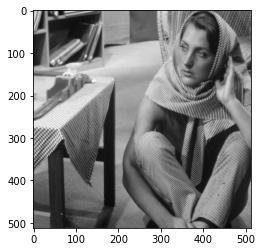

In [25]:
image_gray=cv2.imread('barbara.png',cv2.IMREAD_GRAYSCALE)
print(image_gray)
#Renders the image from the array of data, notice how it is 2d instead of 3d because it has no color
plt.imshow(image_gray,cmap='gray')

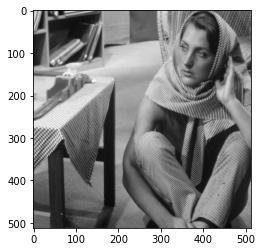

In [26]:
#Filters the images using GaussianBlur on the image with noise using a 3 by 3 Kernel
image_gray=cv2.GaussianBlur(image_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
#Renders the filtered image
plt.imshow(image_gray,cmap='gray')

We can approximate the derivative in the X and Y direction using the Sobel function, here are the parameter:
- src : input image
- ddepth : output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.
- dx : order of the derivative x
- dy : order of the derivative y
- ksize : size of the extended sobel kernel; it must be 1,3,5 or 7
- dx = 1 reperesents the derivative in the x-direction. the function approximate the derivative bt convolving the image with the following kernel
[[1,0,-1],[2,0,-2],[1,0,-1]]


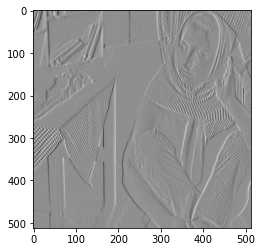

In [30]:
ddepth=cv2.CV_16S
#Applys the filter on the image in the X direction
grad_x=cv2.Sobel(src=image_gray,ddepth=ddepth,dx=1,dy=0,ksize=3)
plt.imshow(grad_x,cmap='gray')

- dy=1 represents the derivative in the y direction. The function approximates the derivative by convolving the image with the following kernel[[1,2,1],[0,0,0],[-1,-2,-1]]

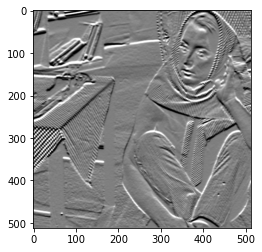

In [36]:
#applys the filter on the image in the x direction
grad_y=cv2.Sobel(src=image_gray,ddepth=ddepth,dx=0,dy=1,ksize=7)
plt.imshow(grad_y,cmap='gray')

In [37]:
#Convert the values back to a number between 0 to 255
abs_grad_x=cv2.convertScaleAbs(grad_x)
abs_grad_y=cv2.convertScaleAbs(grad_y)


In [42]:
#then apply the function  addWeighted to calculate the sum of two arrays as follows:
grad=cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

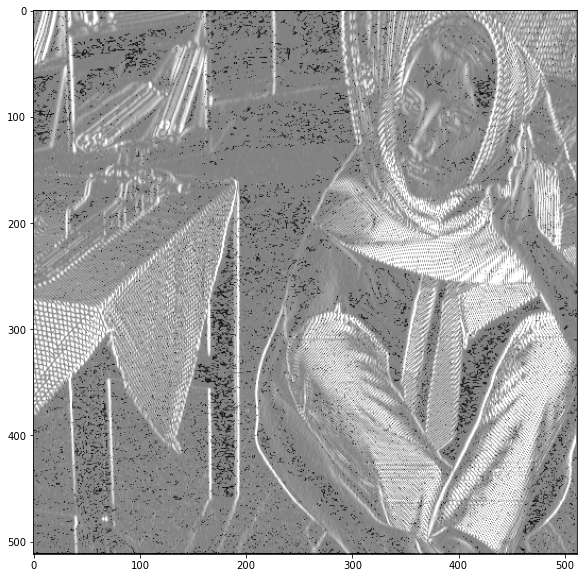

In [43]:
# we then plot the results, we see the image with lines have high intensity values representing a large gradient
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

### Median
- Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.
- we can apply median filters to regular images but let's see how we can use a median filter to improve segmentation.

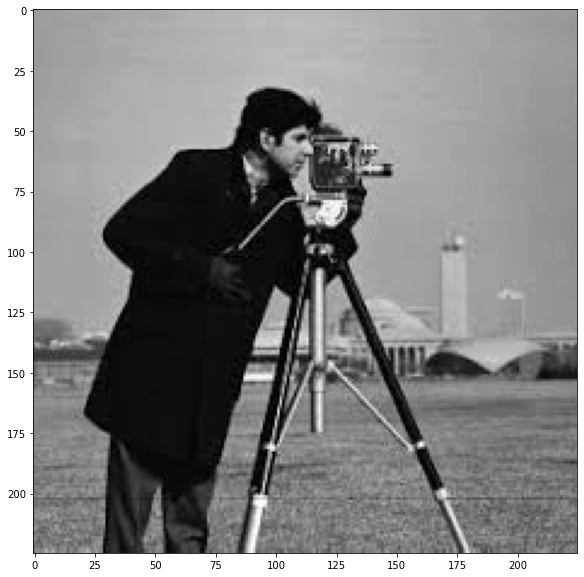

In [44]:
#load the camera man image
image=cv2.imread('cameraman.jpeg',cv2.IMREAD_GRAYSCALE)
#Make the image larger when it renders
plt.figure(figsize=(10,10))
#Render the image
plt.imshow(image,cmap='gray')

- Now let's apply a median filter by using 'medianBlur' function. The parameter for this function are src" the image and ksize : kernel size

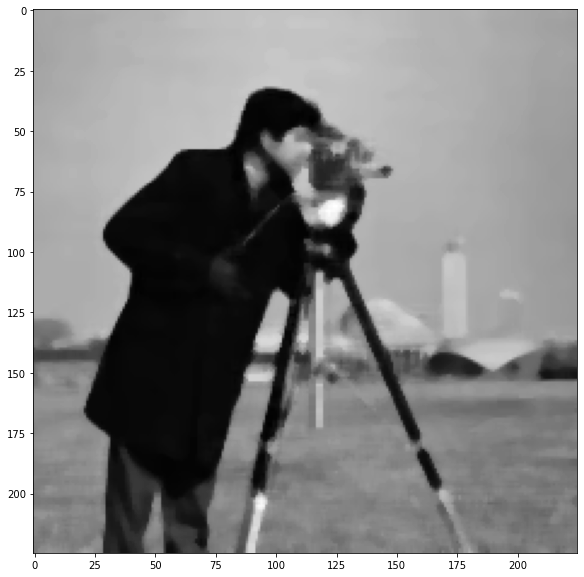

In [45]:
#Filter the image using Median Blur with a kernel of size 5
filterd_image=cv2.medianBlur(image,5)
#Make the image larger when it renders
plt.figure(figsize=(10,10))
#Renders the image
plt.imshow(filterd_image,cmap='gray')

### Threshold function parameter
src: the image to use, thresh:the threshold,maxval:The maxvalue to use,type:Type of filtering.

- The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold.
- In our example the threshold is 0(black) and the type is binary inverse so if a value is above the threshold the assigned value is 0(black) and if it is below or equals to the threshold the maxval 255(white) us used. so if the pixel is 0(black) it is assigned 255(white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells opencv to do. THis is how it would work without THRESH_OTSU.
- Since we are using THRESH_OTSU it means that OpenCV will decide an optimal threshold. In our example below the threshold, we provide does not get used in the filter OpenCV will use an optimal one.

88.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


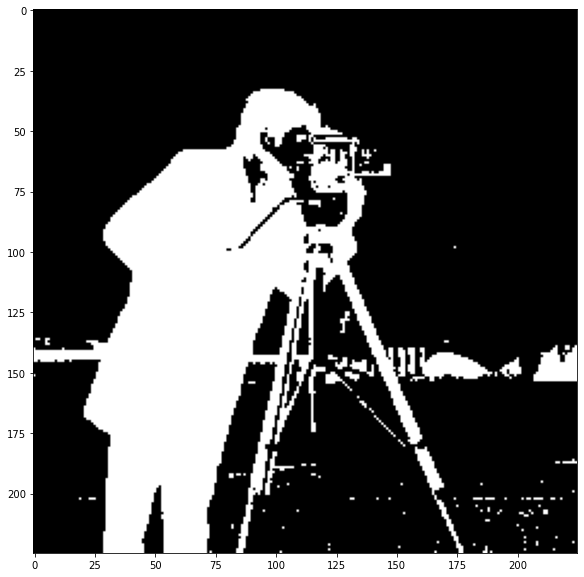

In [50]:
#Returns ret which is threshold used and outs which is the image
ret,outs=cv2.threshold(src=image,thresh=0,maxval=255,type=cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
print(ret)
print(outs)
# Render the image
plt.imshow(outs, cmap='gray')